In [11]:
import helper_classes.data_retriever as dr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# NOTE: Retrieved data are all in the context of 2019 for pre-COVID19 Pandemic Purposes

# Data Retrieval
nyc_gdf = dr.retrieve_census_tiger_shapefile_dataframe()
sebg_df = dr.retrieve_socialexplorer_blockgroup_data()
networkx_df = dr.retrieve_networkx_result()

# Shapefile and Social Explorer Census Data Join into a Geodataframe
nyc_df = pd.merge(sebg_df, nyc_gdf, left_on='Geo_FIPS', right_on='GEOID')
nyc_gdf = gpd.GeoDataFrame(nyc_df, geometry='geometry')


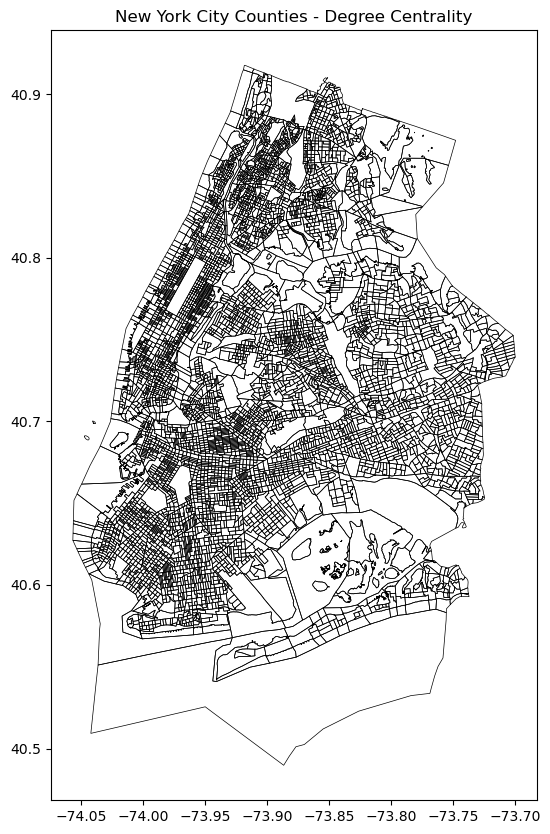

In [12]:

# Create a choropleth map of New York City counties based on the degree centrality
fig, ax = plt.subplots(figsize=(10, 10))

# Add block group boundaries
nyc_gdf.plot(linewidth=0.5, edgecolor='black', facecolor='none', ax=ax)

ax.set_title('New York City Counties - Degree Centrality')
plt.show()

In [13]:

# Remove parks and/or water via a filter
nyc_gdf = nyc_gdf[(nyc_gdf['ALAND'] > 0) & (nyc_gdf['ACS19_5yr_B01001001'] / nyc_gdf['ALAND'].apply(lambda x: pd.np.sqrt(x)) > 0.023)]

C:\Users\cjong\AppData\Local\Temp\ipykernel_22416\3429109671.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  nyc_gdf = nyc_gdf[(nyc_gdf['ALAND'] > 0) & (nyc_gdf['ACS19_5yr_B01001001'] / nyc_gdf['ALAND'].apply(lambda x: pd.np.sqrt(x)) > 0.023)]


In [14]:
import helper_classes.geoprocessor as geo

# Create 500, 1000, 2000, and 5000 km radiuses

nyc_gdf = geo.aggregate_join_nyc_to_buffered_networkx_stations('_mean_radius_500', nyc_gdf, networkx_df, 500)
nyc_gdf = geo.aggregate_join_nyc_to_buffered_networkx_stations('_mean_radius_1000', nyc_gdf, networkx_df, 1000)
nyc_gdf = geo.aggregate_join_nyc_to_buffered_networkx_stations('_mean_radius_2000', nyc_gdf, networkx_df, 2000)


c:\Users\cjong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\cjong\Projects\python\analysis_of_nyc_subway_commute_patterns\geopanda_analysis\helper_classes\geoprocessor.py:15: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: None

  joined_df = gpd.sjoin(nyc_gdf, networkx_gdf, how='left', op='intersects')\
c:\Users\cjong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\cjong\Projects\python\analysis_of

In [15]:
nyc_gdf

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,geometry,dgrs_mean_radius_500,clse_mean_radius_500,btwn_mean_radius_500,dgrs_mean_radius_1000,clse_mean_radius_1000,btwn_mean_radius_1000,dgrs_mean_radius_2000,clse_mean_radius_2000,btwn_mean_radius_2000
0,360050001001,Block Group 1,"Block Group 1, Census Tract 1, Bronx County, N...",ny,150,0,ACSSF,8590,NaN,NaN,...,"POLYGON ((-73.89266 40.79382, -73.89194 40.796...",NaN,NaN,NaN,NaN,NaN,NaN,0.009732,0.083624,0.001725
1,360050002001,Block Group 1,"Block Group 1, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8592,NaN,NaN,...,"POLYGON ((-73.86333 40.81478, -73.86240 40.814...",NaN,NaN,NaN,NaN,NaN,NaN,0.011354,0.081837,0.012850
2,360050002002,Block Group 2,"Block Group 2, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8593,NaN,NaN,...,"POLYGON ((-73.86522 40.81453, -73.86425 40.814...",NaN,NaN,NaN,NaN,NaN,NaN,0.010949,0.081700,0.010237
3,360050002003,Block Group 3,"Block Group 3, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8594,NaN,NaN,...,"POLYGON ((-73.85867 40.80683, -73.85832 40.806...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,360050004001,Block Group 1,"Block Group 1, Census Tract 4, Bronx County, N...",ny,150,0,ACSSF,8596,NaN,NaN,...,"POLYGON ((-73.85960 40.81528, -73.85870 40.815...",NaN,NaN,NaN,NaN,NaN,NaN,0.011354,0.083893,0.020861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,360811621001,Block Group 1,"Block Group 1, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20274,NaN,NaN,...,"POLYGON ((-73.73632 40.73104, -73.73619 40.731...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5904,360811621002,Block Group 2,"Block Group 2, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20275,NaN,NaN,...,"POLYGON ((-73.73714 40.72897, -73.73659 40.730...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5905,360811621003,Block Group 3,"Block Group 3, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20276,NaN,NaN,...,"POLYGON ((-73.73161 40.72789, -73.73160 40.727...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5906,360811621004,Block Group 4,"Block Group 4, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20277,NaN,NaN,...,"POLYGON ((-73.72760 40.72814, -73.72689 40.729...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


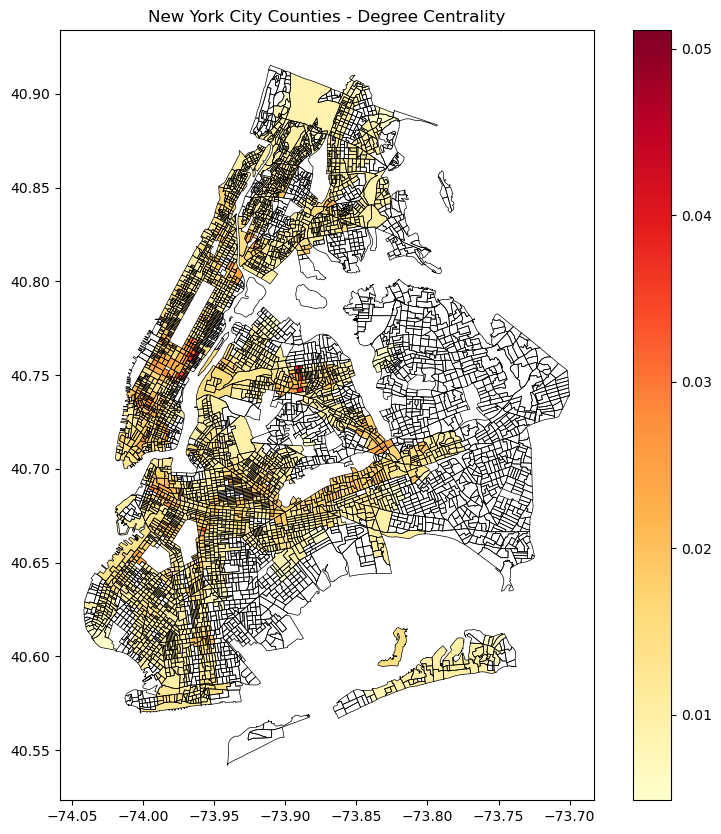

In [16]:

# Create a choropleth map of New York City counties based on the degree centrality
fig, ax = plt.subplots(figsize=(10, 10))

# joined_gdf.plot(column='dgrs', cmap='YlOrRd', legend=True, ax=ax)
nyc_gdf.plot(column='dgrs_mean_radius_500', cmap='YlOrRd', legend=True, ax=ax)

# Add block group boundaries
nyc_gdf.plot(linewidth=0.5, edgecolor='black', facecolor='none', ax=ax)

ax.set_title('New York City Counties - Degree Centrality')
plt.show()

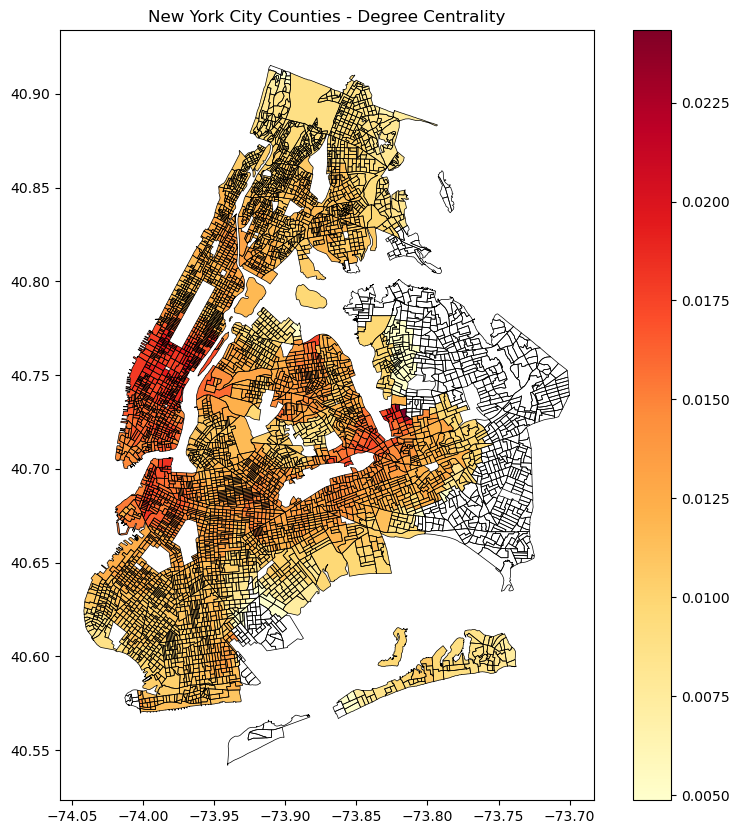

In [17]:

# Create a choropleth map of New York City counties based on the degree centrality
fig, ax = plt.subplots(figsize=(10, 10))

# joined_gdf.plot(column='dgrs', cmap='YlOrRd', legend=True, ax=ax)
nyc_gdf.plot(column='dgrs_mean_radius_2000', cmap='YlOrRd', legend=True, ax=ax)

# Add block group boundaries
nyc_gdf.plot(linewidth=0.5, edgecolor='black', facecolor='none', ax=ax)

ax.set_title('New York City Counties - Degree Centrality')
plt.show()

In [18]:

# Convert the networkx_df DataFrame to a geopandas GeoDataFrame and create circles around each station
networkx_gdf = gpd.GeoDataFrame(
    networkx_df,
    geometry=gpd.points_from_xy(networkx_df.stop_lon, networkx_df.stop_lat),
)

# Create a 1km buffer around the points in networkx_gdf
networkx_gdf_buffered = networkx_gdf.copy()

# Change the CRS to the desired CRS
# networkx_gdf_buffered = networkx_gdf_buffered.to_crs(crs_text)
networkx_gdf_buffered.geometry = networkx_gdf_buffered.buffer(0.03)

# Convert the buffered points to a GeoDataFrame
networkx_gdf_buffered = gpd.GeoDataFrame(networkx_gdf_buffered)

c:\Users\cjong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\cjong\AppData\Local\Temp\ipykernel_22416\2270780862.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: None

  joined_gdf = gpd.sjoin(nyc_gdf, networkx_gdf_buffered, how='inner', op='intersects')\


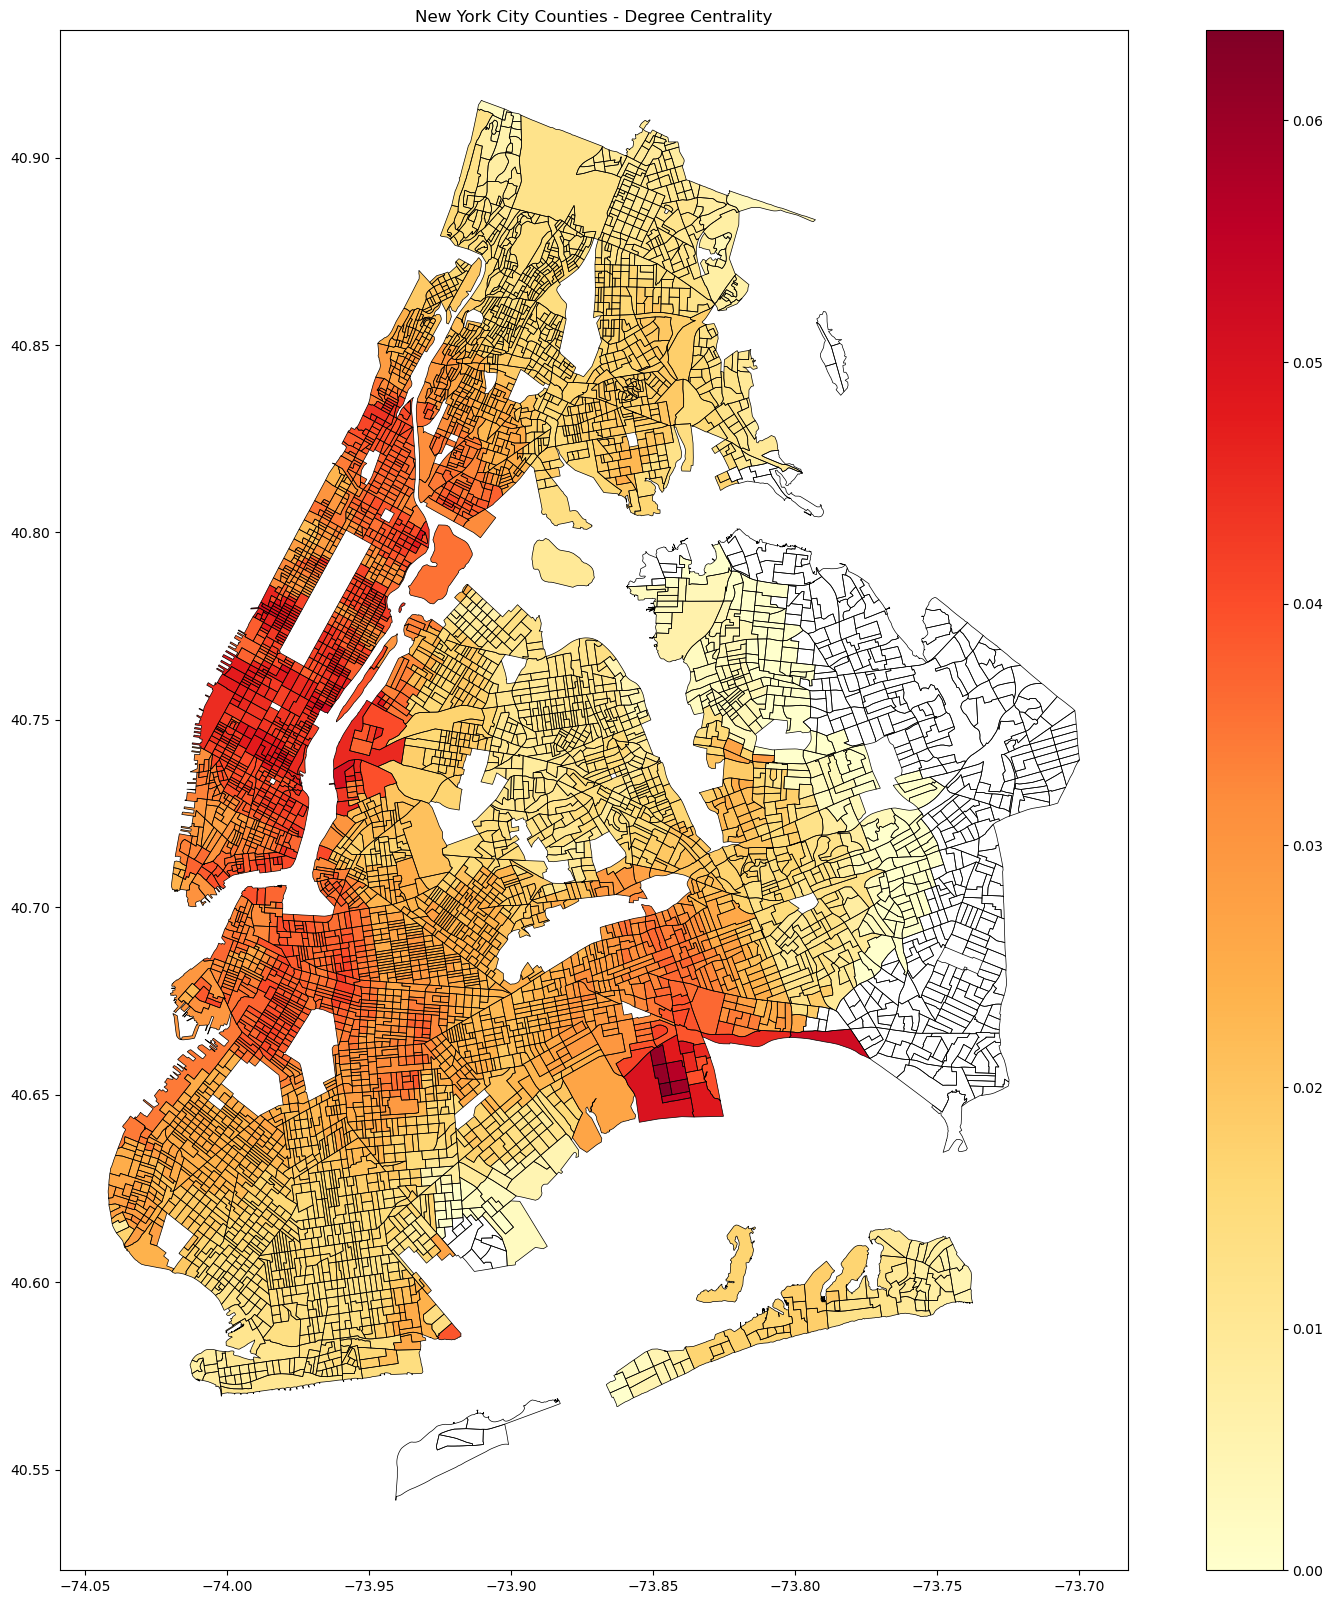

In [19]:
# Spatially join the two GeoDataFrames and aggregate the values of the 'column_to_summarize_1' and 'column_to_summarize_2' columns
joined_gdf = gpd.sjoin(nyc_gdf, networkx_gdf_buffered, how='inner', op='intersects')\
    .groupby(['GEOID'])[['dgrs', 'clse', 'btwn']].mean().reset_index()

# Merge joined_gdf and networkx_gdf_buffered on GEOID
joined_df = pd.merge(joined_gdf, nyc_gdf, on='GEOID')
joined_gdf = gpd.GeoDataFrame(joined_df, geometry='geometry')

# Create a choropleth map of New York City counties based on the degree centrality
fig, ax = plt.subplots(figsize=(20, 20))

# joined_gdf.plot(column='dgrs', cmap='YlOrRd', legend=True, ax=ax)
joined_gdf.plot(column='btwn', cmap='YlOrRd', legend=True, ax=ax)

# Add block group boundaries
nyc_gdf.plot(linewidth=0.5, edgecolor='black', facecolor='none', ax=ax)

# # Add circles for each point with the buffer radius as the circle's radius
# for point in networkx_gdf_buffered.itertuples():
#     ax.add_patch(Circle(xy=point.geometry.centroid.coords[0], radius=0.01, edgecolor='black', facecolor='none'))

ax.set_title('New York City Counties - Degree Centrality')
plt.show()

In [20]:
nyc_gdf

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,geometry,dgrs_mean_radius_500,clse_mean_radius_500,btwn_mean_radius_500,dgrs_mean_radius_1000,clse_mean_radius_1000,btwn_mean_radius_1000,dgrs_mean_radius_2000,clse_mean_radius_2000,btwn_mean_radius_2000
0,360050001001,Block Group 1,"Block Group 1, Census Tract 1, Bronx County, N...",ny,150,0,ACSSF,8590,NaN,NaN,...,"POLYGON ((-73.89266 40.79382, -73.89194 40.796...",NaN,NaN,NaN,NaN,NaN,NaN,0.009732,0.083624,0.001725
1,360050002001,Block Group 1,"Block Group 1, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8592,NaN,NaN,...,"POLYGON ((-73.86333 40.81478, -73.86240 40.814...",NaN,NaN,NaN,NaN,NaN,NaN,0.011354,0.081837,0.012850
2,360050002002,Block Group 2,"Block Group 2, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8593,NaN,NaN,...,"POLYGON ((-73.86522 40.81453, -73.86425 40.814...",NaN,NaN,NaN,NaN,NaN,NaN,0.010949,0.081700,0.010237
3,360050002003,Block Group 3,"Block Group 3, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8594,NaN,NaN,...,"POLYGON ((-73.85867 40.80683, -73.85832 40.806...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,360050004001,Block Group 1,"Block Group 1, Census Tract 4, Bronx County, N...",ny,150,0,ACSSF,8596,NaN,NaN,...,"POLYGON ((-73.85960 40.81528, -73.85870 40.815...",NaN,NaN,NaN,NaN,NaN,NaN,0.011354,0.083893,0.020861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,360811621001,Block Group 1,"Block Group 1, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20274,NaN,NaN,...,"POLYGON ((-73.73632 40.73104, -73.73619 40.731...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5904,360811621002,Block Group 2,"Block Group 2, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20275,NaN,NaN,...,"POLYGON ((-73.73714 40.72897, -73.73659 40.730...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5905,360811621003,Block Group 3,"Block Group 3, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20276,NaN,NaN,...,"POLYGON ((-73.73161 40.72789, -73.73160 40.727...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5906,360811621004,Block Group 4,"Block Group 4, Census Tract 1621, Queens Count...",ny,150,0,ACSSF,20277,NaN,NaN,...,"POLYGON ((-73.72760 40.72814, -73.72689 40.729...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# TODO: select applicable ML model